Набор данных

Nasdaq Data Link имеет большой набор данных для институциональных инвесторов, финтех-компаний и индивидуальных пользователей.

Бесплатные и платные данные, доступ к которым можно получить через один из следующих API-интерфейсов Nasdaq Data Link:
- Streaming API для данных в реальном времени
- REST API для данных в реальном времени или с задержкой
- REST API для данных временных рядов
- REST API для данных таблиц

Взяты данные стоимости акций компании SAP c 03.09.2009 по 03.08.2019.

Проведете аналогичные действия для других наборов данных:
- [Rossmann Store Sales](https://www.kaggle.com/competitions/rossmann-store-sales/data)
- [Behavior of the urban traffic of the city of Sao Paulo in Brazil Data Set](http://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil)
- [ISTANBUL STOCK EXCHANGE Data Set](http://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE)

In [15]:
#подключаем библиотеки
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируйте пакет метрик из sklearn для статистического анализа.
from sklearn import metrics
from sklearn.metrics import explained_variance_score


# Пакет для разделения набора данных
from sklearn.model_selection import train_test_split

# Линейная регрессия
from sklearn.linear_model import LinearRegression

In [16]:
url='https://raw.githubusercontent.com/yakushinav/omo/main/data/sap_stock.csv'
data=pd.read_csv(url,index_col='Date')
data.index = pd.to_datetime(data.index)
print(data.head())

             Open   High    Low  Close  Change  Traded Volume     Turnover  \
Date                                                                         
2009-03-09  25.16  25.82  24.48  25.59     NaN      5749357.0  145200289.0   
2009-03-10  25.68  26.95  25.68  26.87     NaN      7507770.0  198480965.0   
2009-03-11  26.50  26.95  26.26  26.64     NaN      5855095.0  155815439.0   
2009-03-12  26.15  26.47  25.82  26.18     NaN      6294955.0  164489409.0   
2009-03-13  26.01  26.24  25.65  25.73     NaN      6814568.0  176228331.0   

            Last Price of the Day  Daily Traded Units  Daily Turnover  
Date                                                                   
2009-03-09                    NaN                 NaN             NaN  
2009-03-10                    NaN                 NaN             NaN  
2009-03-11                    NaN                 NaN             NaN  
2009-03-12                    NaN                 NaN             NaN  
2009-03-13           

In [17]:
# типы данных столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2550 entries, 2009-03-09 to 2019-03-08
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2242 non-null   float64
 1   High                   2543 non-null   float64
 2   Low                    2543 non-null   float64
 3   Close                  2550 non-null   float64
 4   Change                 11 non-null     float64
 5   Traded Volume          2504 non-null   float64
 6   Turnover               2497 non-null   float64
 7   Last Price of the Day  0 non-null      float64
 8   Daily Traded Units     0 non-null      float64
 9   Daily Turnover         7 non-null      float64
dtypes: float64(10)
memory usage: 219.1 KB


In [18]:
#описательная статистика
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


# Выберем множество значимых признаков

Мы используем дневную цену закрытия Close в качестве значения для прогнозирования, поэтому мы можем отбросить другие признаки.

Столбец «Close» имеет числовой тип данных
«Date» является столбцом индекса и содержит значения даты и времени.

In [19]:
# Создадим новый набор данных
df = pd.DataFrame(data, columns=['Close'])

# Заменим индекс в форме даты на числовой индекс
df = df.reset_index()

# Проверим на пропущенные значения
print(df.isna().values.any())

print(df.head())

False
        Date  Close
0 2009-03-09  25.59
1 2009-03-10  26.87
2 2009-03-11  26.64
3 2009-03-12  26.18
4 2009-03-13  25.73


Анализ данных

Когда мы смотрим на изменение цены с течением времени на графике зависимости цены закрытия от времени, мы увидим, что цена постоянно увеличивается с течением времени, и мы также можем оценить, что тренд может быть линейным.

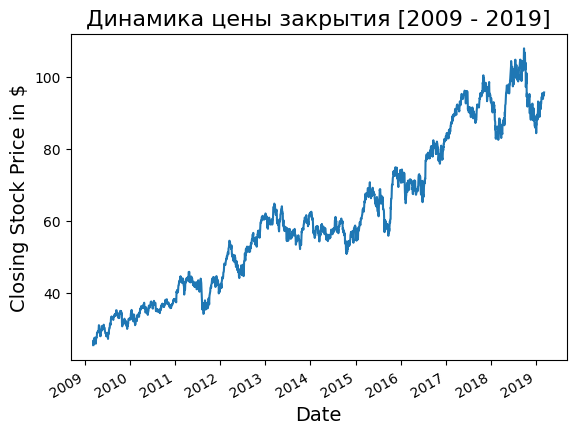

In [20]:
# Подключаем пакет для работы с данным
import matplotlib.dates as mdates

years = mdates.YearLocator() # возьмем каждый год
yearsFmt = mdates.DateFormatter('%Y') # Формат отображения года

# Создаем график
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

ax.plot(df['Date'], df['Close'])

plt.title('Динамика цены закрытия [2009 - 2019]', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Stock Price in $', fontsize=14)
fig.autofmt_xdate()

plt.show()

# Линейная регрессия

Наши данные содержат только одну независимую переменную (X), которая представляет дату и зависимую переменную (Y), которую мы пытаемся предсказать, — это цена акций. Чтобы найти линию близкую к точкам данных,  мы можем использовать простую линейную регрессию.

Линия наилучшего соответствия может быть описана с помощью уравнения
$$
Y=\beta_0+\beta_1X
$$

где

  - Y прогнозируемое значение зависимой переменной
  - $\beta_0$ y-перечечение
  - $\beta_1$ наклон
  - X значение независимой переменной

Цель состоит в том, чтобы найти такие коэффициенты чтобы ошибка, которая представляет собой разницу между каждой точкой в наборе данных и соответствующим прогнозируемым значением, выводимым моделью была минимальна.

In [21]:
# Разбиваем выборку
train, test = train_test_split(df, test_size=0.20)

In [22]:
# Изменить форму индексного столбца в 2D-массив для метода .fit()
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

# Создаем модель машинного обучения
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициенты
print(model.coef_, model.intercept_)

[0.0275678] 25.812230456294856


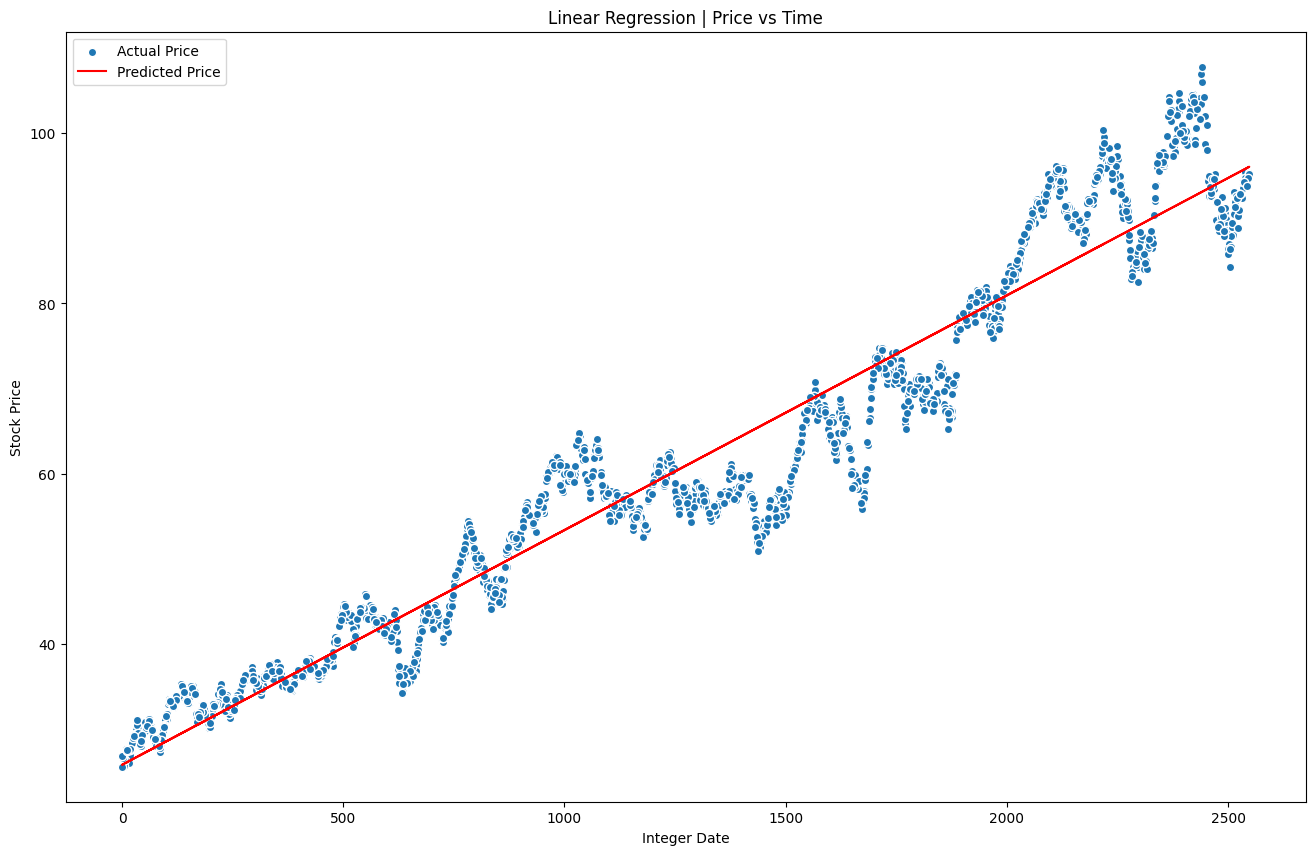

In [23]:
# График исходных данных и модели
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Предсказание

In [24]:
# Тестовые данные
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

# Предсказание
y_pred = model.predict(X_test)

test['Prediction']=y_pred


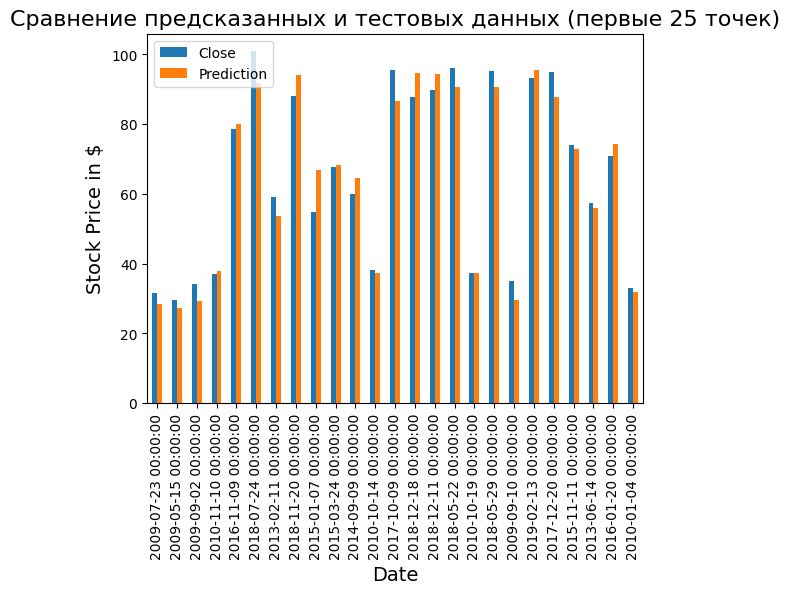

In [25]:
# График
fig, ax = plt.subplots()
test[0:25].plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

plt.title('Сравнение предсказанных и тестовых данных (первые 25 точек)', fontsize=16)

# Метка по оси x
plt.xlabel('Date', fontsize=14)

# Метка по оси y
plt.ylabel('Stock Price in $', fontsize=14)

# Показать график
plt.show()

In [26]:
# Добавим предсказанный тренд к набору данных
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
print(df.head())

# Рассчет ошибок MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))


        Date  Close  Prediction
0 2009-03-09  25.59   25.812230
1 2009-03-10  26.87   25.839798
2 2009-03-11  26.64   25.867366
3 2009-03-12  26.18   25.894934
4 2009-03-13  25.73   25.922502
Mean Absolute Error: 4.375165002678179
Mean Squared Error: 30.461464760035415
Root Mean Squared Error: 5.519190589211013
R2:  0.936379949990807
0.9365030684480737


# Множественная линейная регрессия

In [27]:
# Создадим новый набор данных
df = pd.DataFrame(data, columns=['Open','High','Low','Close'])

# Проверим на пропущенные значения
print(df.isna().values.any())

df=df.dropna()

# Проверим на пропущенные значения
print(df.isna().values.any())



True
False


In [28]:
# Разделим выборку
train, test = train_test_split(df, test_size=0.20)

X=train[['Open','High','Low']]
y=train['Close']

lm = LinearRegression()
lm.fit(X, y)

X_test=test[['Open','High','Low']]
y_test=test['Close']

y_pred=lm.predict(X_test)

# Рассчет ошибок MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.19608595410215057
Mean Squared Error: 0.06859536205203601
Root Mean Squared Error: 0.26190716304071565
R2:  0.9998071507653926
0.9998072427081028


### ISTANBUL STOCK EXCHANGE Data Set

In [29]:
df='https://raw.githubusercontent.com/setarets/mo2025/refs/heads/main/data/data_akbilgic.csv'
data = pd.read_csv(df, sep=';', header=1, encoding='utf-8')
data.index = pd.to_datetime(data.index)
print(data.head())

                              date,"ISE","ISE","SP","DAX","FTSE","NIKKEI","BOVESPA","EU","EM"
1970-01-01 00:00:00.000000000  5-Jan-09,"0.035753708","0.038376187","-0.00467...             
1970-01-01 00:00:00.000000001  6-Jan-09,"0.025425873","0.031812743","0.007786...             
1970-01-01 00:00:00.000000002  7-Jan-09,"-0.02886173","-0.026352966","-0.0304...             
1970-01-01 00:00:00.000000003  8-Jan-09,"-0.062208079","-0.084715902","0.0033...             
1970-01-01 00:00:00.000000004  9-Jan-09,"0.009859905","0.009658112","-0.02153...             


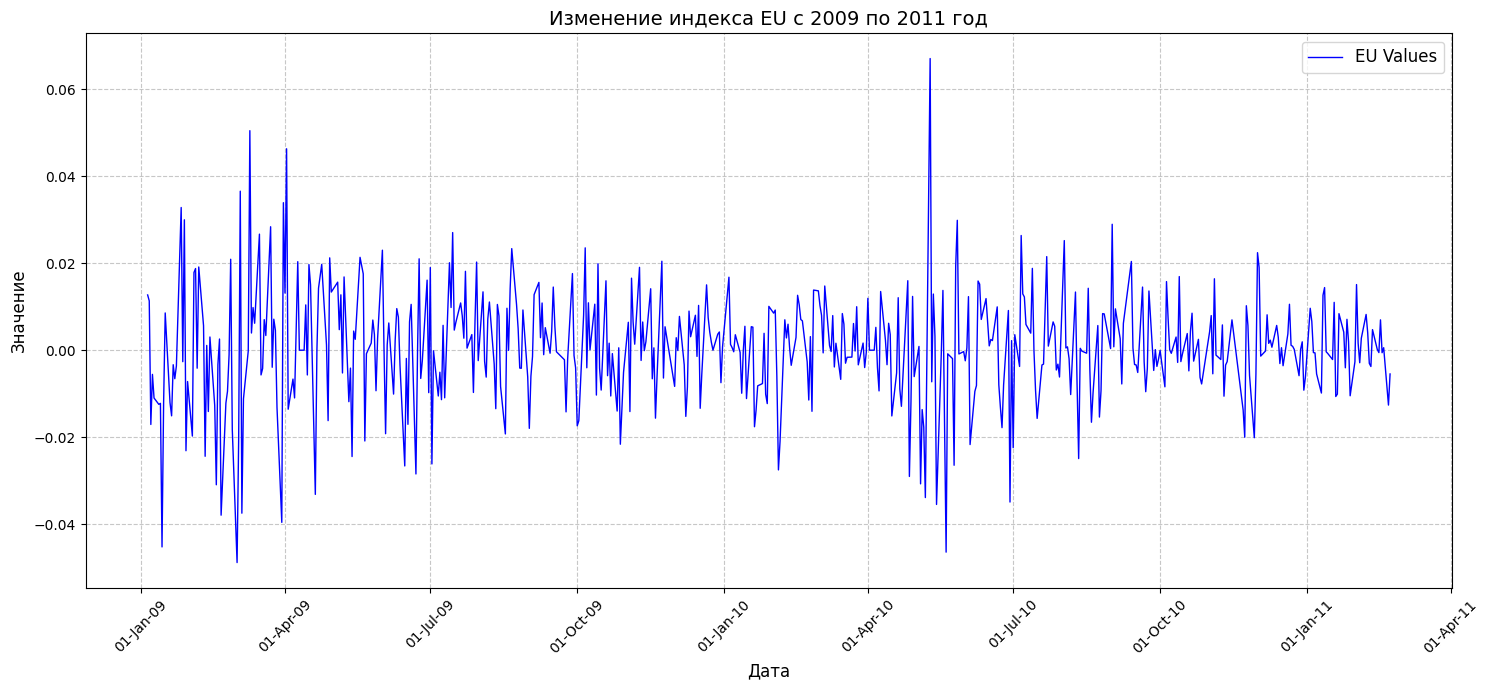

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

df_url = 'https://raw.githubusercontent.com/setarets/mo2025/refs/heads/main/data/data_akbilgic.csv'
data = pd.read_csv(df_url, sep=',', header=1, encoding='utf-8')

data.columns = [
    'date', 'ISE_TL', 'ISE_USD', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'
]


def parse_date(date_str):
    try:
        return datetime.strptime(date_str.strip(), '%d-%b-%y')
    except ValueError:
        return pd.NaT

data['date'] = data['date'].apply(parse_date)
data = data.dropna(subset=['date'])
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(data['date'], data['EU'], label='EU Values', color='blue', linewidth=1)


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())


ax.set_title('Изменение индекса EU с 2009 по 2011 год', fontsize=14)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
train, test = train_test_split(df, test_size=0.20)

Коэффициент (наклон): 1.0367237432505411e-06
Пересечение (intercept): 0.00019325745278495787


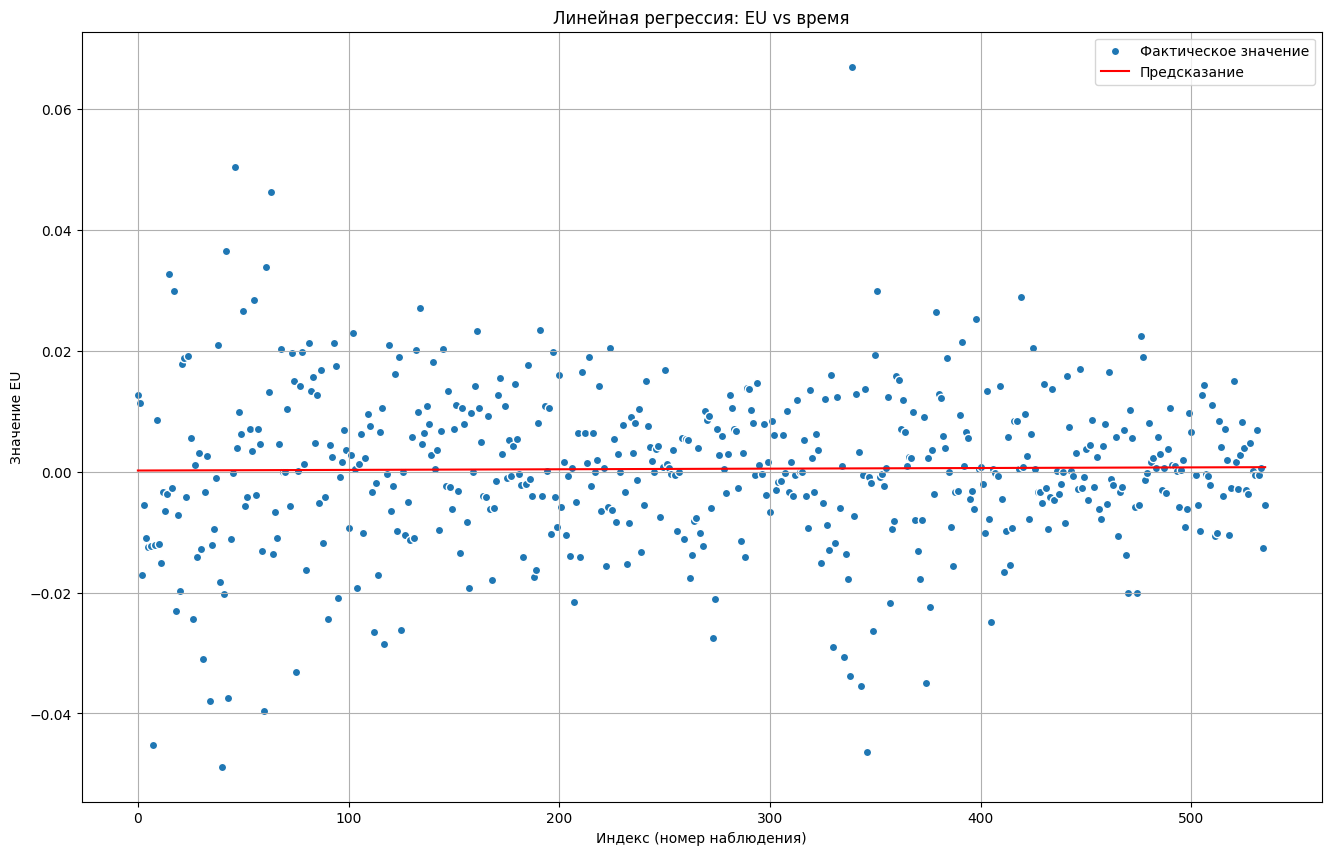

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_url = 'https://raw.githubusercontent.com/setarets/mo2025/refs/heads/main/data/data_akbilgic.csv'
train = pd.read_csv(df_url, sep=',', header=1, encoding='utf-8')

if train['EU'].dtype == object:
    train['EU'] = train['EU'].str.replace(',', '.').astype(float)

X_train = np.array(train.index).reshape(-1, 1)
y_train = train['EU'].values

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Коэффициент (наклон): {model.coef_[0]}")
print(f"Пересечение (intercept): {model.intercept_}")

plt.figure(figsize=(16, 10))
plt.scatter(X_train, y_train, edgecolor='w', label='Фактическое значение')
plt.plot(X_train, model.predict(X_train), color='r', label='Предсказание')
plt.title('Линейная регрессия: EU vs время')
plt.xlabel('Индекс (номер наблюдения)')
plt.ylabel('Значение EU')
plt.legend()
plt.grid(True)
plt.show()

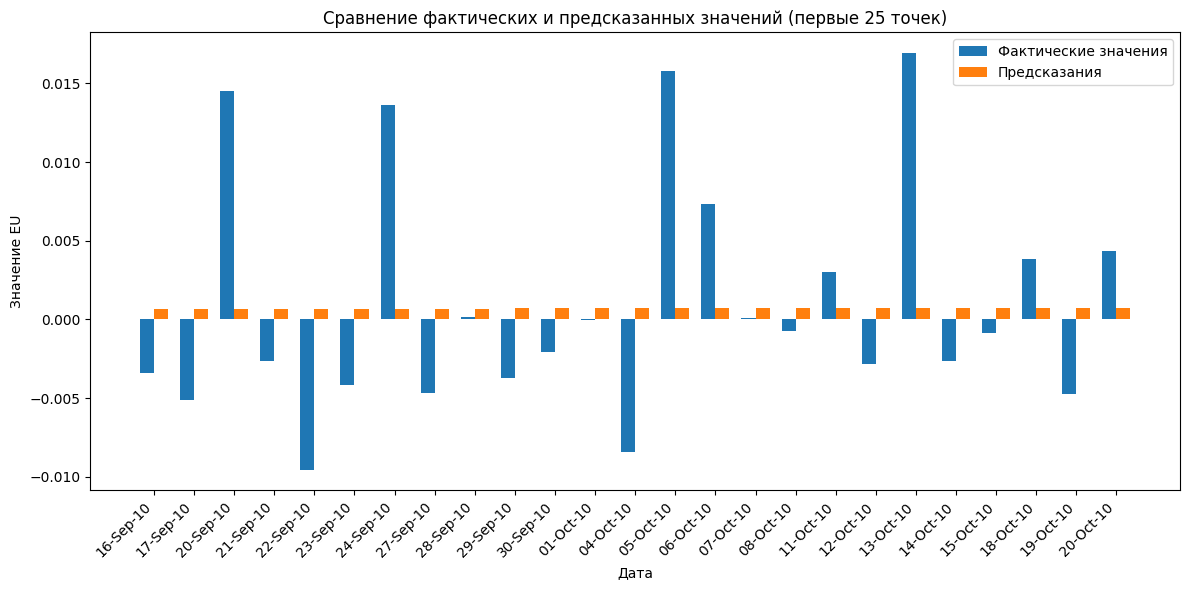

In [52]:
data = data.rename(columns={data.columns[0]: 'date'})
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%y')
if data['EU'].dtype == object:
    data['EU'] = data['EU'].str.replace(',', '.').astype(float)

train_size = int(len(data) * 0.8)
train = data.iloc[:train_size].copy()
test = data.iloc[train_size:].copy()

X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train['EU'].values

model = LinearRegression()
model.fit(X_train, y_train)


X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
test.loc[:, 'Prediction'] = model.predict(X_test)
test_first25 = test.iloc[:25].copy()
test_first25['Date_str'] = test_first25['date'].dt.strftime('%d-%b-%y')


fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = np.arange(len(test_first25))

ax.bar(x - width/2, test_first25['EU'], width, label='Фактические значения')
ax.bar(x + width/2, test_first25['Prediction'], width, label='Предсказания')

ax.set_title('Сравнение фактических и предсказанных значений (первые 25 точек)')
ax.set_xlabel('Дата')
ax.set_ylabel('Значение EU')
ax.set_xticks(x)
ax.set_xticklabels(test_first25['Date_str'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [53]:
# Добавим предсказанный тренд к набору данных
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
print(df.head())

# Рассчет ошибок MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))

        DAX      FTSE    NIKKEI   BOVESPA  Prediction
0  0.002193  0.003894  0.000000  0.031190    0.000160
1  0.008455  0.012866  0.004162  0.018920    0.000161
2 -0.017833 -0.028735  0.017293 -0.035899    0.000162
3 -0.011726 -0.000466 -0.040061  0.028283    0.000163
4 -0.019873 -0.012710 -0.004474 -0.009764    0.000165
Mean Absolute Error: 0.005891799457240693
Mean Squared Error: 5.939674896351769e-05
Root Mean Squared Error: 0.007706928633607404
R2:  -0.0002590273769023099
-0.00011344523328915557


In [65]:
df = pd.DataFrame(data, columns=['DAX',	'FTSE',	'NIKKEI',	'BOVESPA'])

print(df.isna().values.any())

df=df.dropna()

print(df.isna().values.any())

False
False


In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/setarets/mo2025/refs/heads/main/data/data_akbilgic.csv', skiprows=1)
features = ['SP', 'DAX', 'FTSE']
target = 'ISE'

train, test = train_test_split(df, test_size=0.20, random_state=42)

X = train[features]
y = train[target]

lm = LinearRegression()
lm.fit(X, y)


X_test = test[features]
y_test = test[target]
y_pred = lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.010691469389741214
Mean Squared Error: 0.00019333521982141852
Root Mean Squared Error: 0.013904503580546072
R2 Score: 0.41599076208115304
Explained Variance Score: 0.4189979334247995
